<div style="text-align: center; color:rgb(0, 0, 0); font-family: Arial, sans-serif; background-color:rgb(137, 200, 129); padding: 10px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 1.2); line-height: 0.1;">

### **Series de Tiempo**
#### **Universidad Central**
#### Maestría en Analítica de Datos
#### Docente: Wilson Sandoval Rodriguez
##### wsandovalr@ucentral.edu.co

</div>

<!-- TOC -->

Tabla de contenidos
1. [Introducción](#Estacionariedad)
2. [Análisis](#RuidoBlanco)
3. [Conclusión](#-modelos)
    + [io](#Primera)

<!-- /TOC -->


## **Estacionariedad descriptiva**

una serie es estacionaria cuando es estable a lo largo del tiempo, es
decir, cuando la **media** y **varianza** son constantes en el tiempo. Esto se
refleja gráficamente en que los valores de la serie tienden a oscilar
alrededor de una media constante y la variabilidad con respecto a esa
media también permanece constante en el tiempo.

No estacionariasSon series en las cuales la tendencia y/o
variabilidad cambian en el tiempo.




# 🔎 **Estacionariedad**

Para hacer inferencias estadísticas en la estructura de un proceso estocástico (o serie de tiempo) sobre el histórico observado del proceso, normalmente se deben hacer algunas suposiciones simplificadoras (presumiblemente razonables) sobre esa estructura. El supuesto más importante es el de  **estacionariedad**.
	 

Dicho concepto tendrá dos versiones:

- Estacionariedad fuerte 
- Estacionariedad débil





<div style=" font-family: Arial, sans-serif; background-color:rgba(31, 179, 248, 0.18); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">


## 🔎 Estacionariedad Fuerte y Débil.

Una serie de tiempo se puede ver como un proceso estocástico, se dice que es estacionario si su media y varianza son constantes en el tiempo y si el valor de la covarianza entre 2 periodos depende sólo de la distancia o rezago entre los tiempos.

Sea $Y_t$ una serie de tiempo con las siguientes propiedades se dice que es debilmente estacionaria o simplemente estacionaria:



  - 1️⃣ $E(y_t)$ es  constante para todo $t$.

  - 2️⃣ $Var(y_t)$ es constante para todo $t$ y,

  - 3️⃣ $Cov(y_t,y_{t+h})$ sólo depende de $h$ para cualquier $t$
 
 La condición adicional para que una serie de tiempo sea fuertemente estacionaria es que la distribución conjunta de $Y_{t_1},Y_{t_2}, \cdots, Y_{t_n}$ es la misma que la distribución conjunta de $Y_{t_1-k}, Y_{t_2-k}, \cdots, Y_{t_n-k}$ para todas las opciones de puntos de tiempo $t_1, t_2, \cdots, t_n$ y todas las opciones de rezago temporal $k$. es decir, la distribución sólo depende de la diferencia de tiempo $h$ y no del tiempo $(t_1,...,t_k)$



<span style="color: red;">
*En la práctica, buscamos que los datos sean estacionarios para poder proseguir con el tratamiento estadístico de los mismos.*
</span>



<span style="color: red;">
**La estacionariedad es un concepto fundamental para el análisis
de las series de tiempo.** 
</span>




- La estacionariedad significa que el proceso mediante el cual se crearon los datos, es constante en el tiempo.

- 🚫 **CUIDADO**: Esto no significa que los datos no puedan cambiar. Significa que los supuestos distribucionales del mecanismo que genera los datos son constantes en el
tiempo.
- El punto de partida de la metodología Box-Jenkins es la estacionariedad. De ahí su importancia práctica.



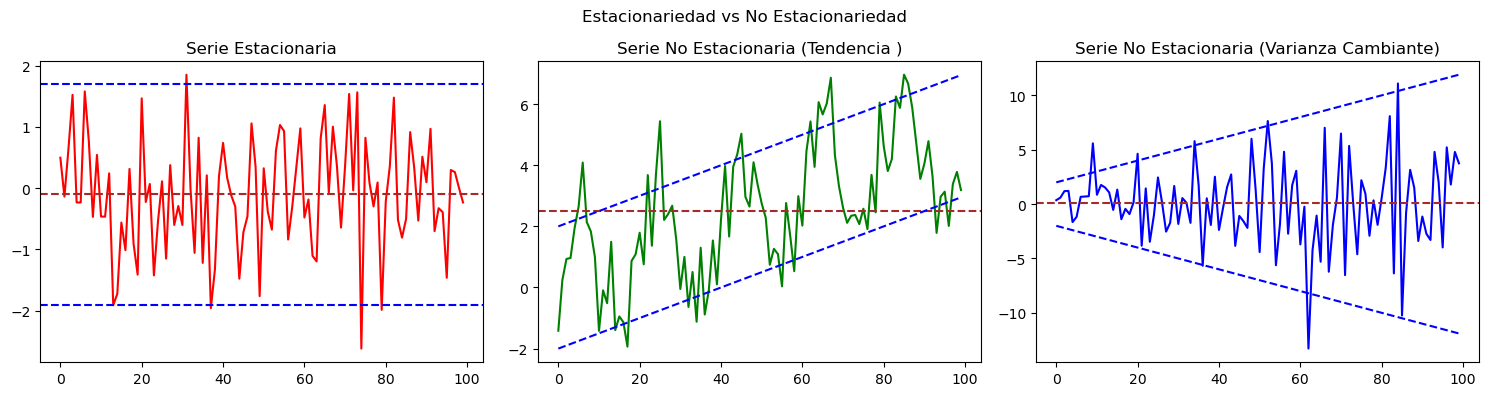

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Crear datos
np.random.seed(42)
t = np.arange(100)

# Serie estacionaria (ruido blanco)
stationary = np.random.normal(loc=0, scale=1, size=100)

# Serie no estacionaria con tendencia y estacionalidad
trend = 0.05 * t
seasonality = 2 * np.sin(t * 2 * np.pi / 20)
non_stationary = trend + seasonality + np.random.normal(loc=0, scale=1, size=100)

# Serie no estacionaria con varianza cambiante
heteroscedastic = (1 + 0.05 * t) * np.random.normal(loc=0, scale=1, size=100)

# Graficar las series
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

# Serie estacionaria
t_mean = np.mean(stationary)
t_std = np.std(stationary)
axes[0].plot(t, stationary, color='red')
axes[0].axhline(y=t_mean, color='brown', linestyle='--')
axes[0].axhline(y=t_mean + 2 * t_std, color='blue', linestyle='--')
axes[0].axhline(y=t_mean - 2 * t_std, color='blue', linestyle='--')
axes[0].set_title("Serie Estacionaria")

# Serie no estacionaria (tendencia y estacionalidad)
t_mean = np.mean(non_stationary)
axes[1].plot(t, non_stationary, color='green')
axes[1].axhline(y=t_mean, color='brown', linestyle='--')
axes[1].plot(t, trend + seasonality.max(), color='blue', linestyle='--')
axes[1].plot(t, trend - seasonality.max(), color='blue', linestyle='--')
axes[1].set_title("Serie No Estacionaria (Tendencia )")

# Serie no estacionaria (varianza cambiante)
t_mean = np.mean(heteroscedastic)
axes[2].plot(t, heteroscedastic, color='blue')
axes[2].axhline(y=t_mean, color='brown', linestyle='--')
axes[2].plot(t, (1 + 0.05 * t) * 2, color='blue', linestyle='--')
axes[2].plot(t, -(1 + 0.05 * t) * 2, color='blue', linestyle='--')
axes[2].set_title("Serie No Estacionaria (Varianza Cambiante)")

plt.suptitle("Estacionariedad vs No Estacionariedad")
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


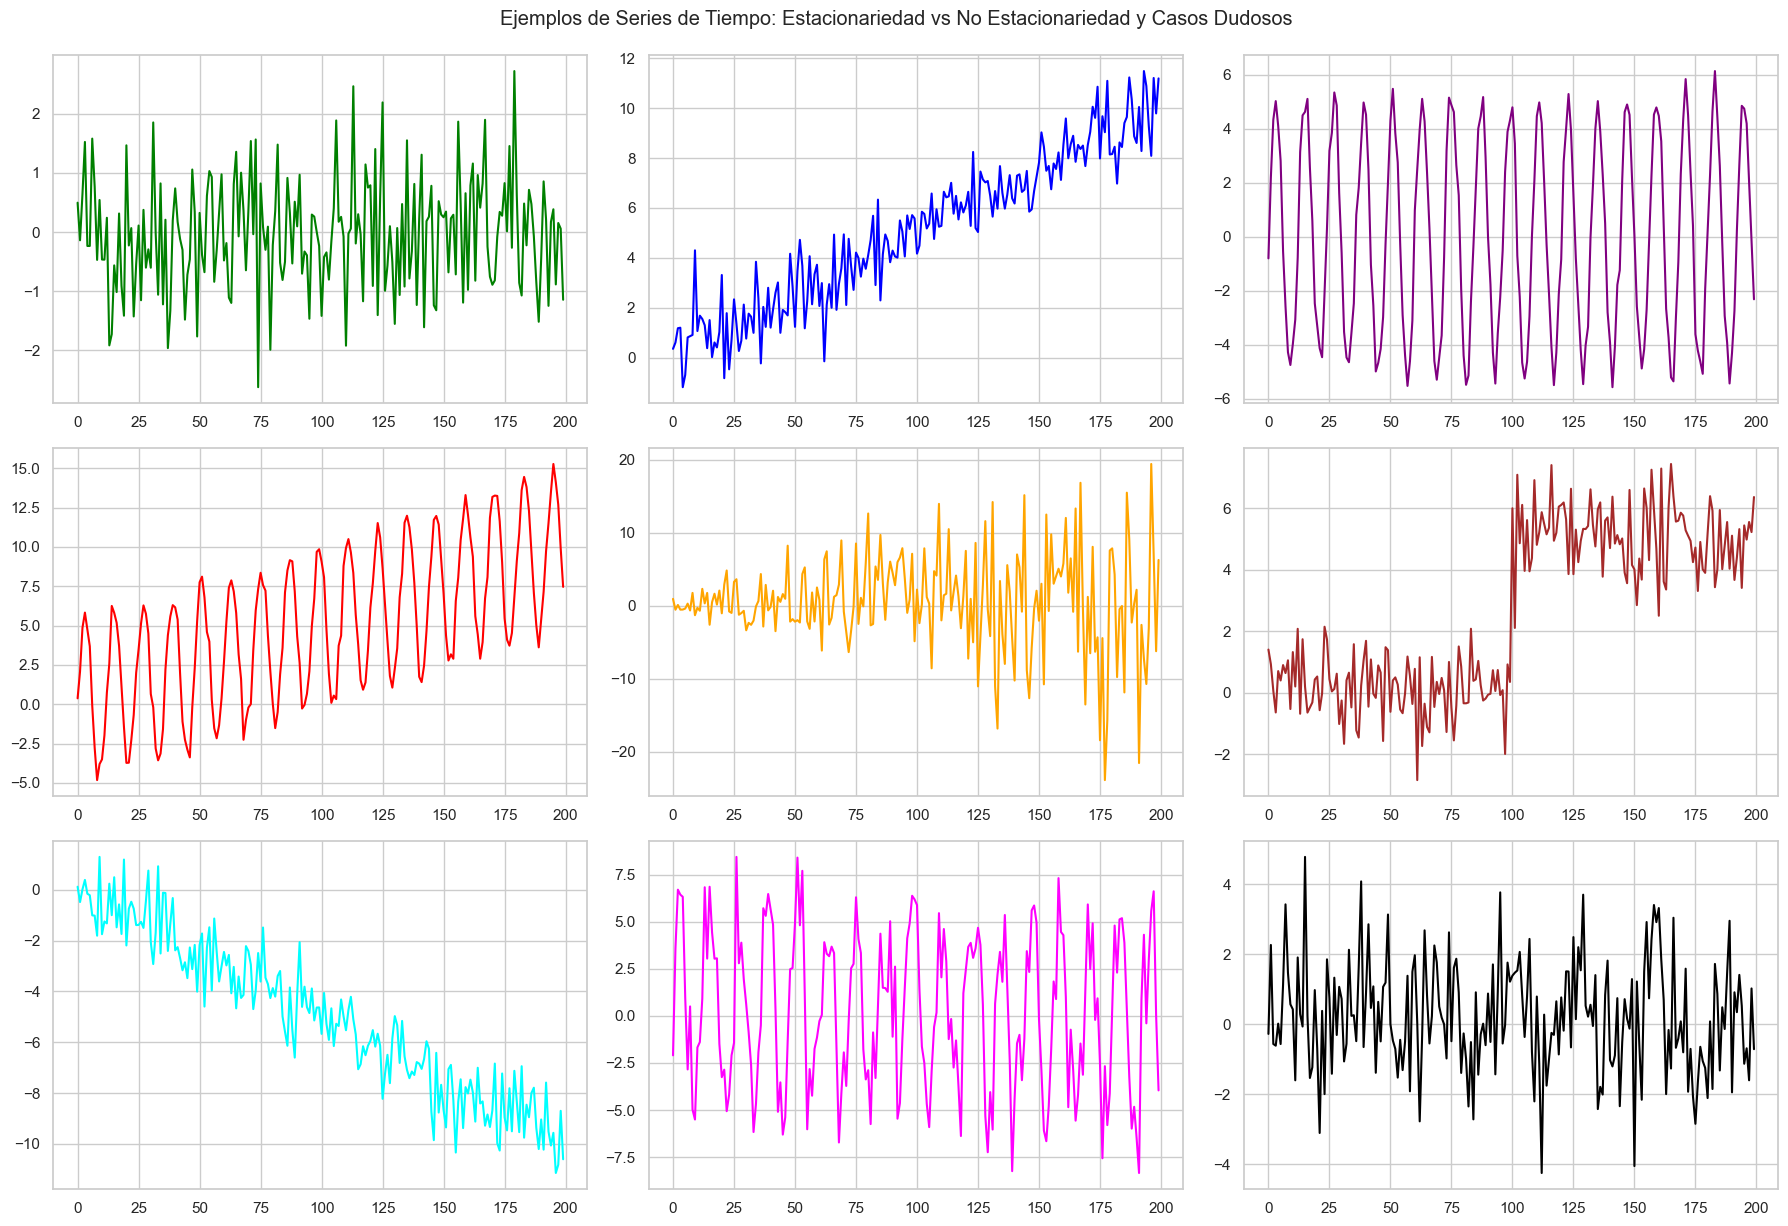

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
# C ejemplos de estacionariedad y no estacionariedad
np.random.seed(42)
t = np.arange(200)

# Serie estacionaria: ruido blanco
stationary_series = np.random.normal(loc=0, scale=1, size=200)
# Serie no estacionaria: tendencia
trend_series = 0.05 * t + np.random.normal(loc=0, scale=1, size=200)
# Serie no estacionaria: estacionalidad
seasonal_series = 5 * np.sin(2 * np.pi * t / 12) + np.random.normal(loc=0, scale=0.5, size=200)
# Serie no estacionaria: tendencia + estacionalidad
trend_seasonal_series = 0.05 * t + 5 * np.sin(2 * np.pi * t / 12) + np.random.normal(loc=0, scale=0.5, size=200)
# Serie con varianza cambiante
heteroscedastic_series = (1 + 0.05 * t) * np.random.normal(loc=0, scale=1, size=200)
# Serie con cambio estructural
structural_break_series = np.concatenate([np.random.normal(loc=0, scale=1, size=100), np.random.normal(loc=5, scale=1, size=100)])
# Serie con tendencia decreciente
decreasing_trend_series = -0.05 * t + np.random.normal(loc=0, scale=1, size=200)
# Serie con estacionalidad y ruido blanco
seasonal_noise_series = 5 * np.sin(2 * np.pi * t / 12) + np.random.normal(loc=0, scale=2, size=200)
# Serie confusa con patrón incierto
confusing_series = np.sin(2 * np.pi * t / 30) + np.random.normal(loc=0, scale=1.5, size=200)
# Graficar las series
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes[0, 0].plot(t, stationary_series, color='green')
axes[0, 1].plot(t, trend_series, color='blue')
axes[0, 2].plot(t, seasonal_series, color='purple')
axes[1, 0].plot(t, trend_seasonal_series, color='red')
axes[1, 1].plot(t, heteroscedastic_series, color='orange')
axes[1, 2].plot(t, structural_break_series, color='brown')
axes[2, 0].plot(t, decreasing_trend_series, color='cyan')
axes[2, 1].plot(t, seasonal_noise_series, color='magenta')
axes[2, 2].plot(t, confusing_series, color='black')
plt.tight_layout()
plt.suptitle("Ejemplos de Series de Tiempo: Estacionariedad vs No Estacionariedad y Casos Dudosos", y=1.02)
plt.show()


<span style= "color: #5a8d84 ">

## **Ruido Blanco**

</span>


El objetivo de las Series Temporales es descomponer la serie observada en dos partes: una es la parte dependiente del pasado y la otra la parte impredecible

$$Y_t=f(Y_{(t-1)}, Y_{(t-2)},....,Y_1)+ a_t $$

- Si todas las series que observamos en la realidad fuesen Ruido Blanco serían impredecibles y no habría ningún modelo que proponer.


Un **Ruido Blanco** es una serie tal que su media es cero, la varianza es constante y es incorrelacionada.


  - ☑️    $E(a_t)=0$

  - ☑️    $Var(a_t)=\sigma_a^2$

  - ☑️    $cov(a_t,a_{t+_h})=0$   



Se trata de un proceso en el que todas sus variables son independientes.


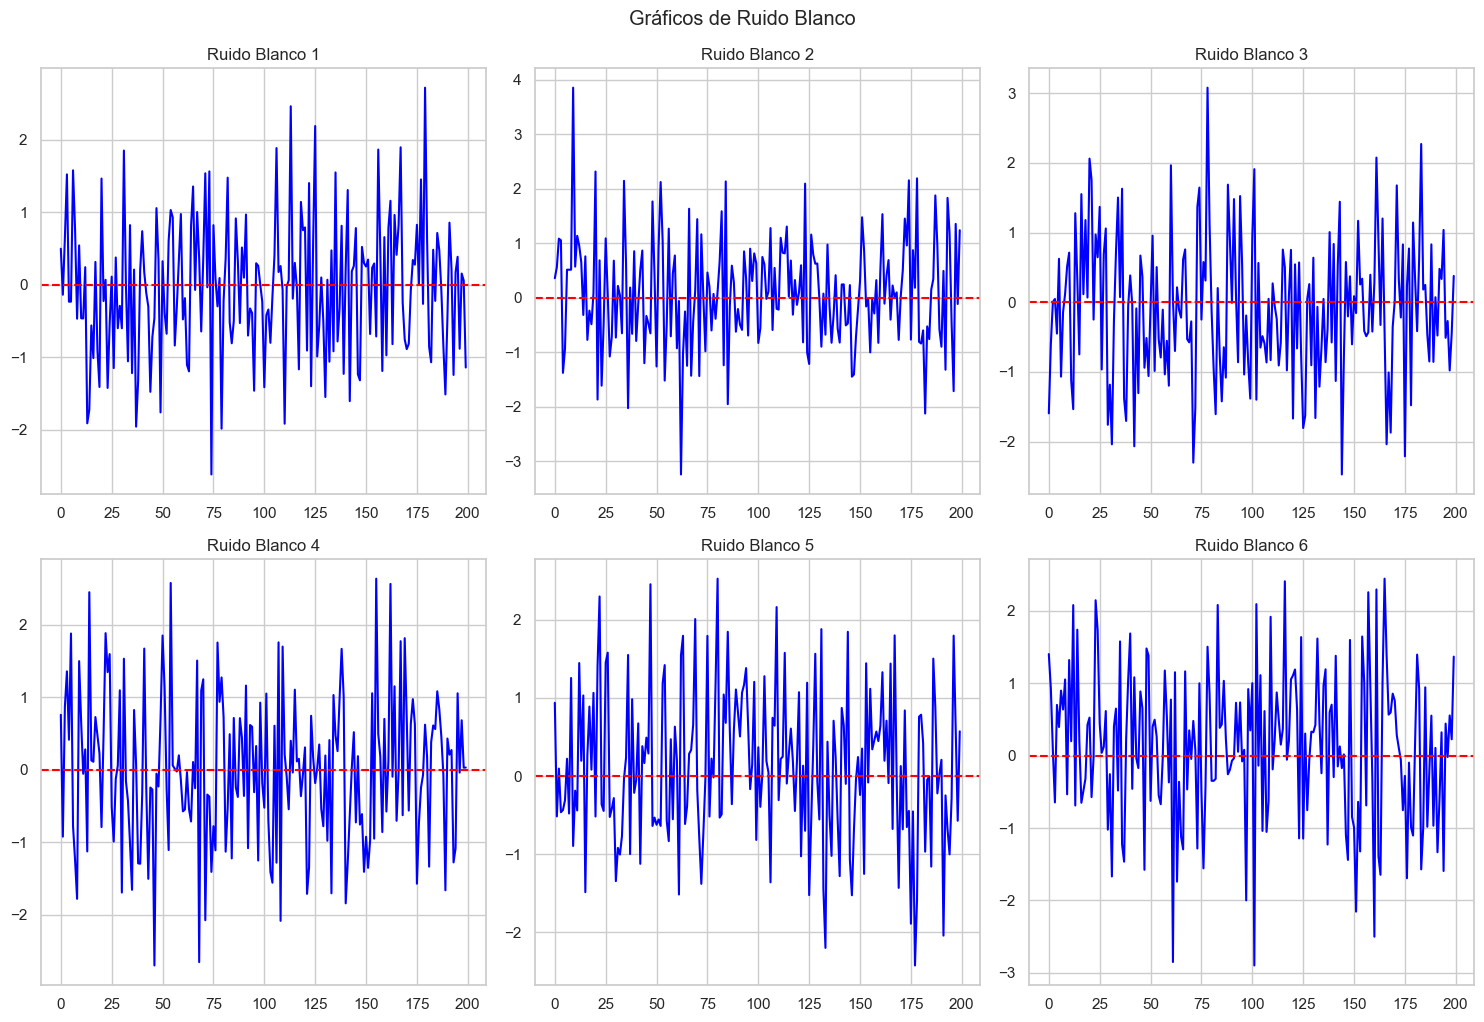

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generar múltiples gráficos de ruido blanco
np.random.seed(42)
t = np.arange(200)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flatten()):
    noise = np.random.normal(loc=0, scale=1, size=200)
    ax.plot(t, noise, color='blue')
    ax.set_title(f"Ruido Blanco {i+1}")
    ax.axhline(y=0, color='red', linestyle='--')

plt.tight_layout()
plt.suptitle("Gráficos de Ruido Blanco", y=1.02)
plt.show()


## ❎ **Eliminación de tendencia**

Una forma sencilla de eliminar una tendencia aproximadamente lineal es diferenciar la serie, es decir,
considerar la serie de diferencias entre una observación y la anterior
en lugar de la serie original. Si $x_t$ es una serie contenida en $x$,
para calcular $$∇x_t=x_t−x_{t−1}$$ 


In [35]:
from statsmodels.datasets import get_rdataset
df=get_rdataset("AirPassengers").data
df.head()

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [97]:
import pandas as pd
# Convertir el índice a formato datetime si es necesario
df['time'] = pd.date_range(start='1949-01', periods=len(df), freq='ME')
df.set_index('time', inplace=True)
df

,value,forecast
time,,
1949-01-31,112,NaN
1949-02-28,118,NaN
1949-03-31,132,NaN
1949-04-30,129,NaN
1949-05-31,121,NaN
...,...,...
1960-08-31,606,598.790938
1960-09-30,508,498.316625
1960-10-31,461,443.635267


In [37]:
import hvplot.pandas
df.hvplot(y='value', title='Pasajeros de Aerolíneas', xlabel='Fecha', ylabel='Pasajeros', width=800, height=400)

:Curve   [time]   (value)

diferencia 

In [39]:
df['value'].diff().hvplot(title='Diferencia de Pasajeros de Aerolíneas', xlabel='Fecha', ylabel='Diferencia', width=800, height=400)

:Curve   [time]   (value)

In [44]:
data=pd.DataFrame()
data["Airpassenger"]=df['value']
data["Diferencia"]=df['value'].diff()
data

,Airpassenger,Diferencia
time,,
1949-01-31,112,NaN
1949-02-28,118,6.0
1949-03-31,132,14.0
1949-04-30,129,-3.0
1949-05-31,121,-8.0
...,...,...
1960-08-31,606,-16.0
1960-09-30,508,-98.0
1960-10-31,461,-47.0


## 🔍 **MODELOS**

Uno de los modelos de tipo ARIMA más simples es un modelo en el que utilizamos un modelo lineal para predecir el valor en el momento actual utilizando el valor en el momento anterior. Esto se llama un modelo *AR (1)* , que significa modelo **autorregresivo de orden 1** . 

- El orden del modelo indica cuántas veces anteriores usamos para predecir el tiempo presente.    



### Modelo **AR($1$)**

teóricamente, el modelo **AR ($1$)** está escrito
    
$$x_t = \delta + \phi_1 x_{t-1} + w_t$$
    
▶️ $w_t \overset{iid}{\sim} N(0, \sigma^2_w)$ lo que significa que los errores se distribuyen independientemente con una distribución normal que tiene media 0 y varianza constante

▶️ Propiedades de los errores. $w_t$  son independientes de $x$.




### Modelo **AR(2)**

$$x_t = \delta + \phi_1 x_{t-1}+ \phi_2 x_{t-2} + w_t$$

### Modelo **AR($p$)**


$$x_t = \delta + \phi_1 x_{t-1}+ \phi_2 x_{t-2}+ \cdots\phi_{p}x_{t-p}  + w_t$$

    



## ▶️ **Función de autocorrelación (ACF)**

El **ACF** de la serie da correlaciones entre $x_t$ y $x_{t-h}$  para  $h= 1, 2, 3$, etc.


Teóricamente, la autocorrelación entre $x_t$  y $x_{t-h}$ es igual


**Definición Formal:**

La **Función de Autocorrelación** $\rho_k $ en un retardo $k $ es una medida de la correlación entre los valores de una serie de tiempo $\{X_t\} $ y los valores de la misma serie en retardos $k $, es decir, entre $X_t $ y $X_{t-k} $. Matemáticamente, la ACF en un retardo $k $ se define como:


<div style="background-color:rgba(200, 204, 206, 0.12); padding: 15px; border-radius: 10px;">

$$\rho_k = \frac{\text{Cov}(X_t, X_{t-k})}{\text{Var}(X_t)} 💡$$

</div>


donde:

- $\text{Cov}(X_t, X_{t-k}) $ es la covarianza entre $X_t $ y $X_{t-k} $.
- $\text{Var}(X_t) $ es la varianza de la serie de tiempo.

Para una serie temporal estacionaria, la ACF depende solo del retardo $k $ y no del tiempo $t $.

**Propiedades:**
- $\rho_0 = 1 $, porque la autocorrelación en el retardo cero es la correlación de la serie consigo misma.

- $\rho_k $ es simétrica respecto a $k $, es decir, $\rho_k = \rho_{-k} $.

- La ACF es útil para identificar el orden del proceso MA (Media Móvil).


In [51]:
df

,value
time,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461


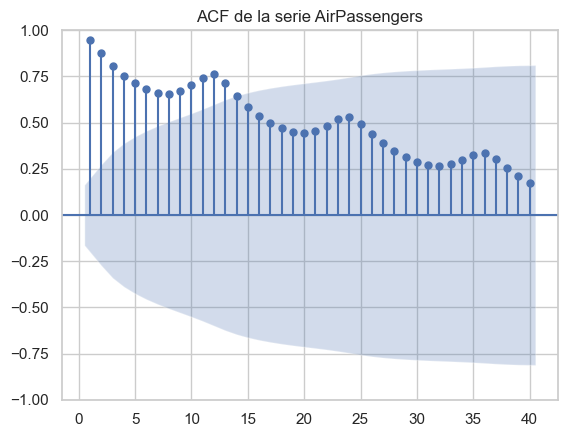

In [95]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['value'], lags=40, zero=False, alpha=0.05)
plt.title('ACF de la serie AirPassengers')
plt.show()

## Función de autocorrelación parcial PACF

En general, una correlación parcial es una correlación condicional. Es la correlación entre dos variables bajo el supuesto de que conocemos y tenemos en cuenta los valores de algún otro conjunto de variables.


**Definición Formal:**

La **Función de Autocorrelación Parcial** $ \phi_{kk} $ en un retardo $ k $ mide la correlación entre $ X_t $ y $ X_{t-k} $ después de eliminar el efecto de las autocorrelaciones de todos los retardos menores (1, 2, ..., $ k-1 $). Se define como la autocorrelación entre $ X_t $ y $ X_{t-k} $ condicionada a $ X_{t-1}, X_{t-2}, \dots, X_{t-(k-1)} $.

Matemáticamente, para una serie estacionaria $ \{X_t\} $, la PACF en el retardo $ k $ está definida por la siguiente relación de recursión:

$$
\phi_{kk} = \frac{\text{Cov}(X_t - \hat{X}_{t|t-1,\dots,t-(k-1)}, X_{t-k} - \hat{X}_{t-k|t-k+1,\dots,t-(k-1)})}{\sqrt{\text{Var}(X_t - \hat{X}_{t|t-1,\dots,t-(k-1)}) \cdot \text{Var}(X_{t-k} - \hat{X}_{t-k|t-k+1,\dots,t-(k-1)})}}
$$

donde $ \hat{X}_{t|t-1,\dots,t-(k-1)} $ es la mejor predicción lineal de $ X_t $ basada en las observaciones $ X_{t-1}, X_{t-2}, \dots, X_{t-(k-1)} $.

**Propiedades:**

- La PACF en el retardo $ k = 1 $ es simplemente la ACF en $ k = 1 $.

- La PACF puede ser utilizada para identificar el orden del proceso AR (Autorregresivo).




Para una serie temporal, la autocorrelación parcial entre $x_t$ y $x_{t-h}$  se define como la correlación condicional entre $x_t$ y $x_{t-h}$ condicionado a $x_{t-h+1}$ , ...,$x_{t-1}$ , el conjunto de observaciones que se encuentran entre los puntos de tiempo  $t$ y $t-h$


-  La  autocorrelación parcial de primer orden se definirá para que sea igual a la autocorrelación de primer orden.

- El 2nd autocorrelación parcial orden (lag) es

$$\dfrac{\text{Cov}(x_t, x_{t-2}| x_{t-1})}{\sqrt{\text{Var}(x_t|x_{t-1})\text{Var}(x_{t-2}|x_{t-1})}}$$



### Cálculo de $ \phi_{22} $ usando las Ecuaciones de Yule-Walker

1. **Expresión General de Yule-Walker:**

   $$
   \rho_i = \phi_{j1} \rho_{i-1} + \phi_{j2} \rho_{i-2} + \dots + \phi_{jj} \rho_{i-j}
   $$

2. **Cálculo de $ \phi_{11} $:**

   Para $ j = 1 $ y $ i = 1 $:

   $$
   \rho_1 = \phi_{11}
   $$

3. **Cálculo de $ \phi_{22} $:**

   Se establece un sistema de ecuaciones para $ j = 2 $:

   - Para $ i = 1 $:

     $$
     \rho_1 = \phi_{21} + \phi_{22} \rho_1
     $$

   - Para $ i = 2 $:

     $$
     \rho_2 = \phi_{21} \rho_1 + \phi_{22}
     $$

   Estas ecuaciones se pueden expresar en forma matricial:

   $$
   \begin{pmatrix}
   \rho_1 \\
   \rho_2
   \end{pmatrix}
   =
   \begin{pmatrix}
   1 & \rho_1 \\
   \rho_1 & 1
   \end{pmatrix}
   \begin{pmatrix}
   \phi_{21} \\
   \phi_{22}
   \end{pmatrix}
   $$

4. **Resolución por la Regla de Cramer:**

   Utilizando la regla de Cramer, se calcula $ \phi_{22} $:

   $$
   \phi_{22} = \frac{\rho_1^2 - \rho_2}{1 - \rho_1^2}
   $$



**Nota:** Calcular manualmente la Función de Autocorrelación Parcial (PACF) puede ser un proceso complejo. Esto se debe a que, para cada retardo, es necesario ajustar la correlación entre las observaciones eliminando la influencia de todos los retardos anteriores. Este ajuste se realiza resolviendo sistemas de ecuaciones lineales, frecuentemente utilizando las ecuaciones de Yule-Walker. 




## Propiedades de la AR (1)
    
    
- La media (teórica) de $x_t$ es: $E(x_t)=\mu = \dfrac{\delta}{1-\phi_1}$

- La varianza de $x_t$ es: $\text{Var}(x_t) = \dfrac{\sigma^2_w}{1-\phi_1^2}$

- La correlación $h$ entre observaciones períodos de tiempo separados es $\rho_h = \phi^h_1$
 
    
Esto define el ACF teórico para una variable d


¡Nota!  $\phi_1$ es la pendiente en el modelo **AR ($1$)** y ahora vemos que también es la autocorrelación de retraso 1


IntSlider(value=2, description='Orden AR (p)', max=5)

Output()

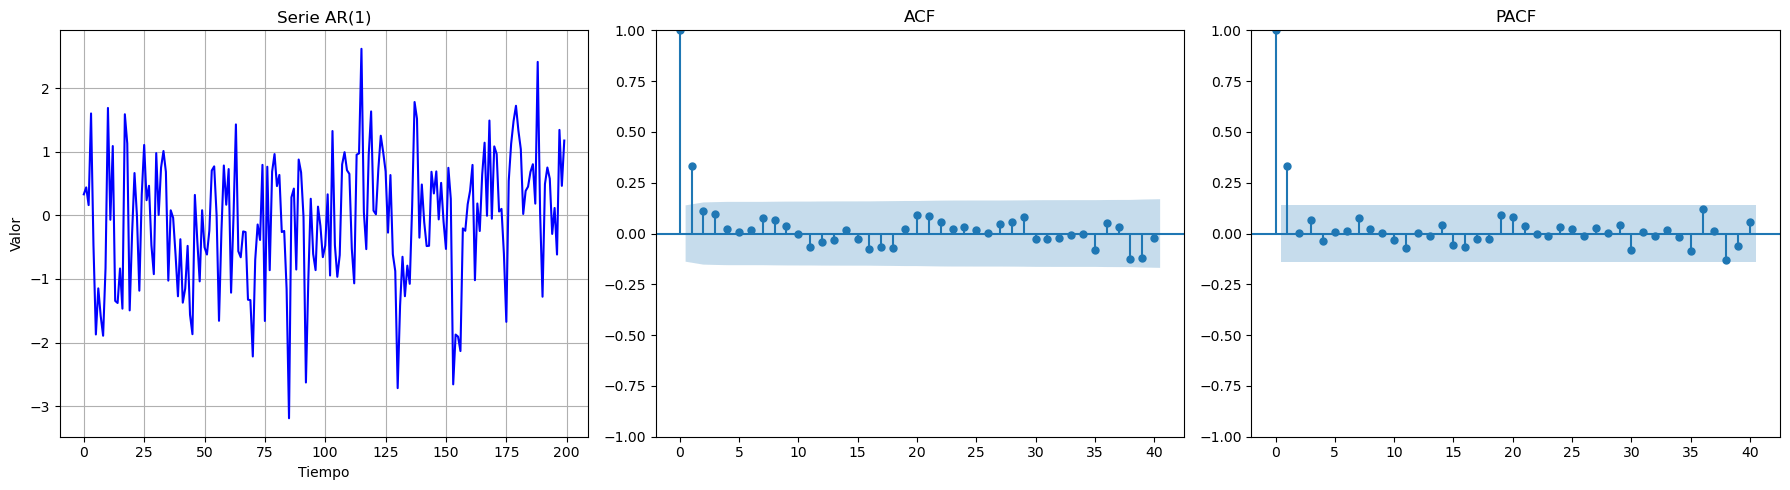

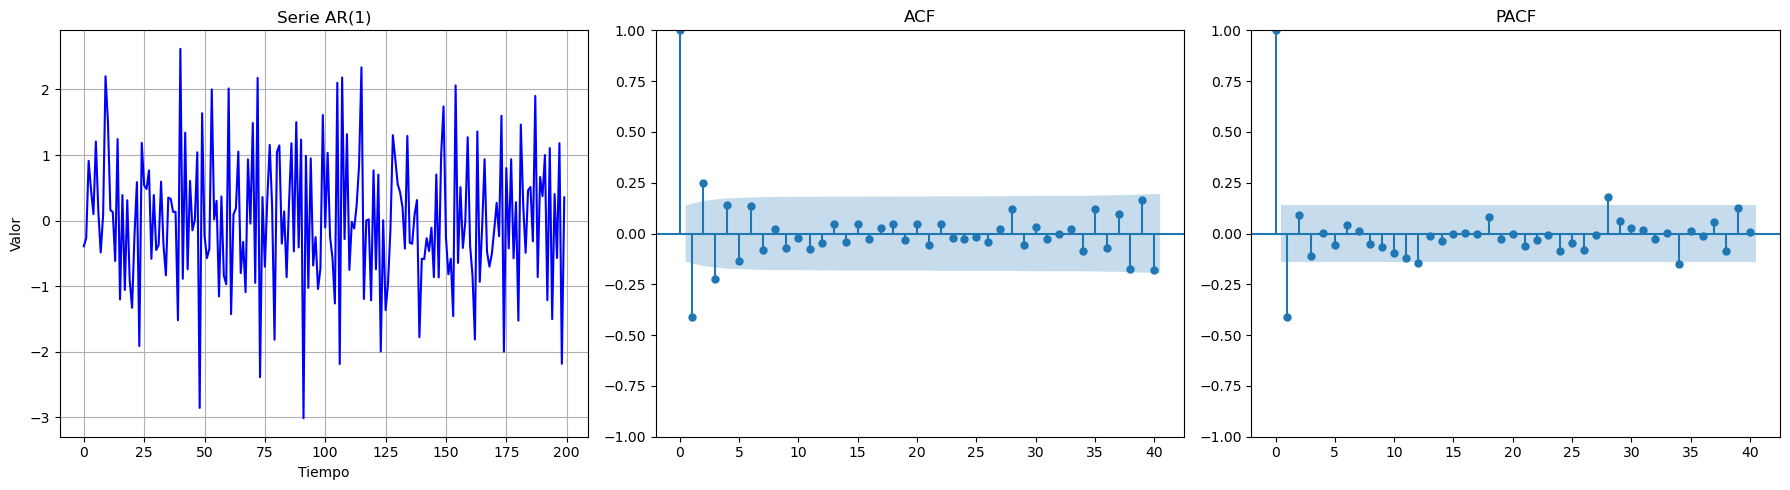

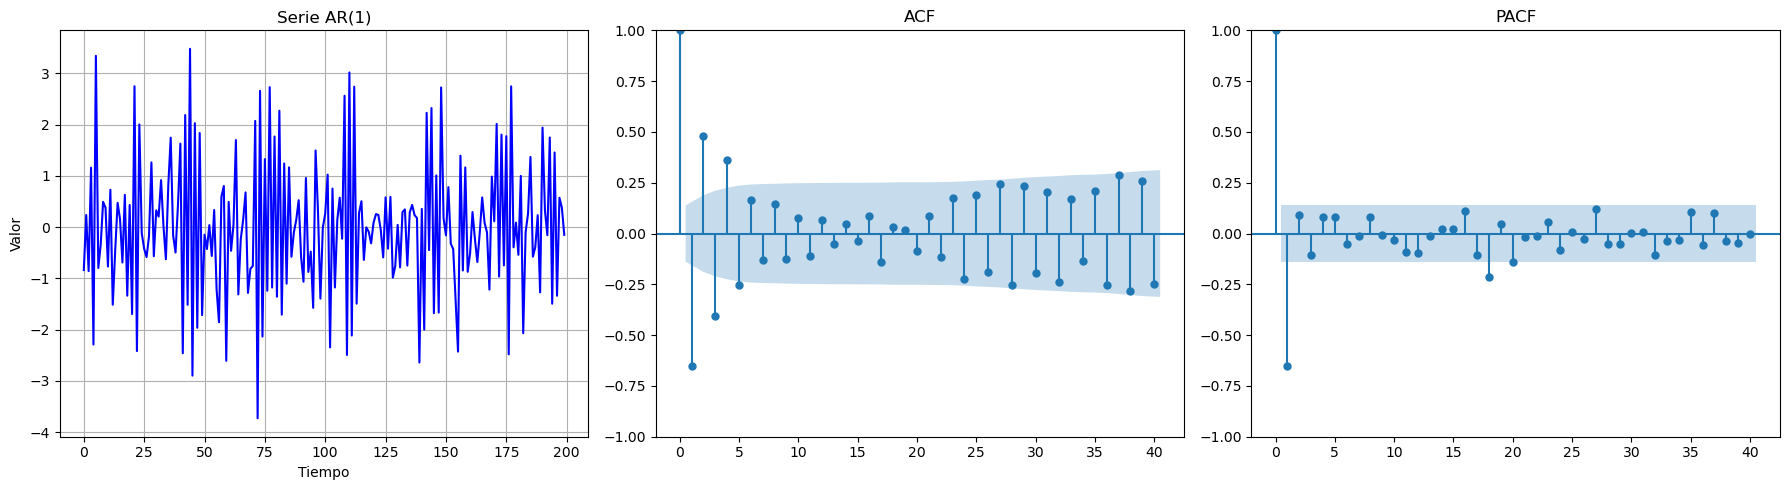

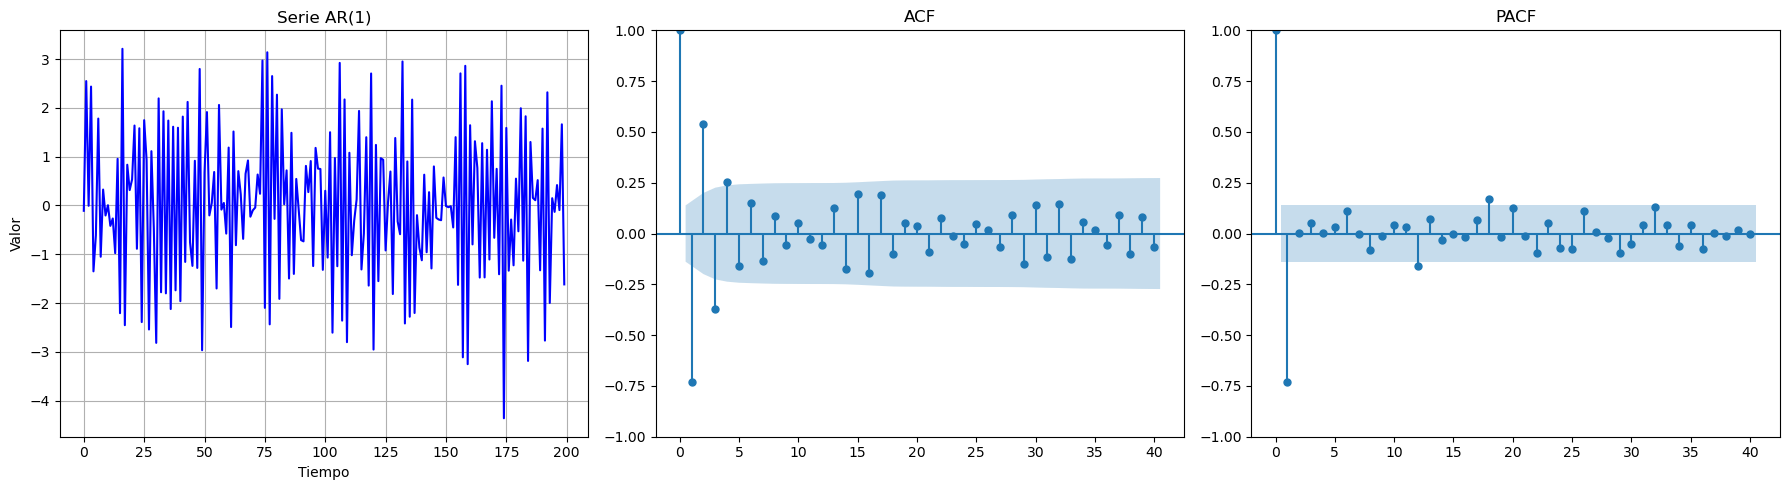

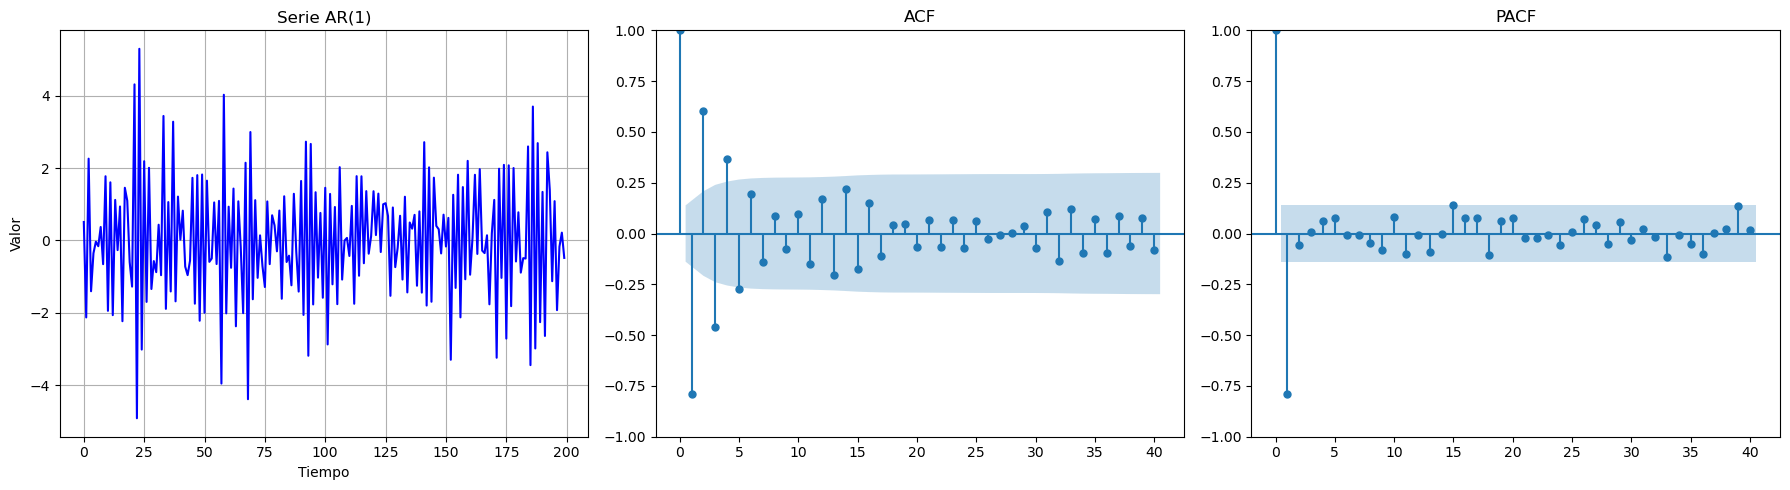

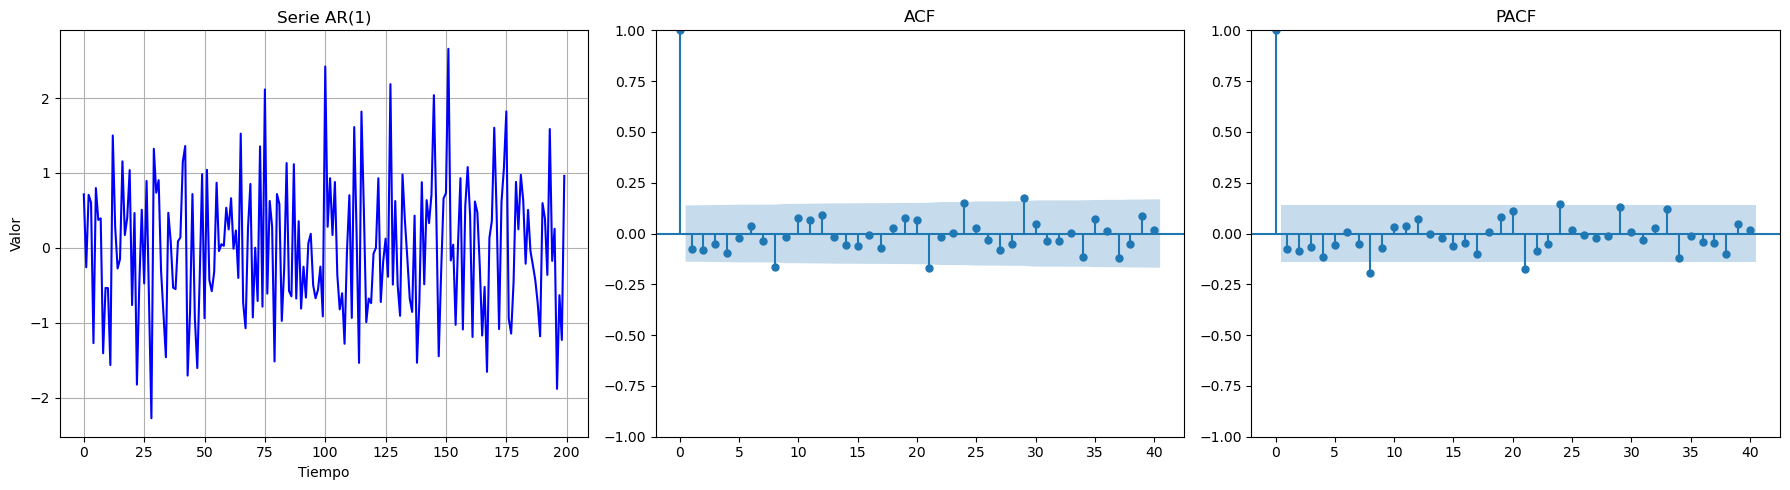

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, VBox, HBox, widgets
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def simulate_ar_process(p, n_samples=200, **ar_coeffs):
    """
    Simula un proceso AR(p) y muestra la serie, el ACF y el PACF.

    Parámetros:
    - p: Orden del proceso AR.
    - ar_coeffs: Coeficientes para los términos AR.
    - n_samples: Número de muestras a generar.
    """
    # Construir el array de coeficientes AR
    ar_list = [ar_coeffs.get(f'ar{i+1}', 0) for i in range(p)]
    ar_coeffs_full = np.r_[1, -np.array(ar_list)] if p > 0 else np.array([1])
    ma_coeffs_full = np.array([1])

    # Crear proceso AR y simular datos
    arma_process = ArmaProcess(ar_coeffs_full, ma_coeffs_full)
    simulated_data = arma_process.generate_sample(nsample=n_samples)

  

    # Graficar las tres gráficas juntas
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Graficar serie temporal
    axes[0].plot(simulated_data, color="blue")
    axes[0].set_title(f"Serie AR({p})")
    axes[0].set_xlabel("Tiempo")
    axes[0].set_ylabel("Valor")
    axes[0].grid(True)

    # Graficar ACF
    plot_acf(simulated_data, lags=40, ax=axes[1])
    axes[1].set_title("ACF")

    # Graficar PACF
    plot_pacf(simulated_data, lags=40, ax=axes[2])
    axes[2].set_title("PACF")

    plt.tight_layout()
    plt.show()

# Crear sliders dinámicos que se ajustan al orden AR seleccionado
def update_ui(p):
    sliders = [widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=0.5, description=f"AR{i+1}") for i in range(p)]
    box = VBox(sliders)

    def on_slider_change(change):
        ar_coeffs = {f'ar{i+1}': slider.value for i, slider in enumerate(sliders)}
        simulate_ar_process(p, **ar_coeffs)

    for slider in sliders:
        slider.observe(on_slider_change, names='value')

    return box

def run_interactive():
    p_slider = widgets.IntSlider(min=0, max=5, step=1, value=2, description="Orden AR (p)")
    output = widgets.Output()

    def update_sliders(*args):
        with output:
            output.clear_output()
            ui = update_ui(p_slider.value)
            display(ui)

            ar_coeffs = {f'ar{i+1}': ui.children[i].value for i in range(len(ui.children))}
            simulate_ar_process(p_slider.value, **ar_coeffs)

    p_slider.observe(update_sliders, names='value')
    display(p_slider, output)
    update_sliders()

run_interactive()

In [3]:
import pandas as pd
import numpy as np
import datetime as dt

ipc=pd.read_excel("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/IPC.xlsx")
ipc

,Año(aaaa)-Mes(mm),Índice,Inflación anual %,Inflación mensual %,Inflación año corrido %
0,200001,40.30,8.25,1.29,1.29
1,200002,41.23,8.89,2.30,3.62
2,200003,41.93,9.73,1.71,5.39
3,200004,42.35,9.96,1.00,6.44
4,200005,42.57,10.00,0.52,7.00
...,...,...,...,...,...
278,202303,131.77,13.34,1.05,4.56
279,202304,132.80,12.82,0.78,5.38
280,202305,133.38,12.36,0.43,5.83
281,202306,133.78,12.13,0.30,6.15


In [4]:
ipc.index=pd.to_datetime(ipc["Año(aaaa)-Mes(mm)"].astype(str), format="%Y%m")

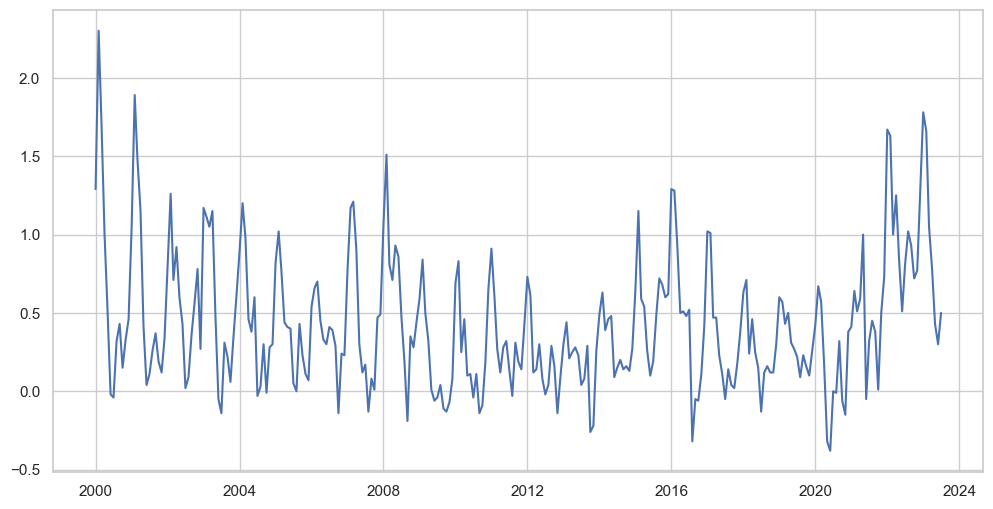

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(ipc.index, ipc["Inflación mensual %"])
# Configurar el formato de las fechas en el eje x


In [6]:
import plotly.express as px

In [7]:
px.line(data_frame=ipc, x=ipc.index, y=ipc["Inflación mensual %"])